# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [4]:
#Your code here
import numpy as np
import pandas as pd
import flatiron_stats as fs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

Comparison of AdjustedCompensation by FormalEducation for Bachelor's degree and Master's degree
--------------------------------------------------------------
Median Values: 	Bachelor: 38399.4 	Master: 53812.17
Mean Values: 	Bachelor: 64887.1 	Master: 69139.9
Sample Sizes: 	Bachelor: 1107 	Master: 1990
Welch's T-Test P-Value: 0.33077639451272267


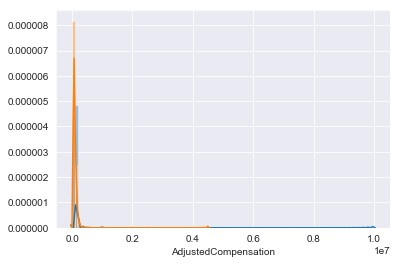

In [6]:
#Your code here
# Hypothesis Test
# h_0: The mean salary of Master's degree employees is equal to that of Bachelor's degree employees.
# h_0: The mean salary of Master's degree employees is higher than that of Bachelor's degree employees.

# Test (with Outliers)
y = 'AdjustedCompensation'
x = 'FormalEducation'
bach = "Bachelor's degree"
mast = "Master's degree"

subset = df[(~df[x].isnull()) & (~df[y].isnull())]
sample_b = subset[subset[x]==bach][y]
sample_m = subset[subset[x]==mast][y]
sns.distplot(sample_b)
sns.distplot(sample_m)

print('Comparison of {} by {} for {} and {}'.format(y, x, bach, mast))
print('--------------------------------------------------------------')
print("Median Values: \tBachelor: {} \tMaster: {}".format(round(sample_b.median(), 2), round(sample_m.median(), 2)))
print("Mean Values: \tBachelor: {} \tMaster: {}".format(round(sample_b.mean(), 2), round(sample_m.mean(), 2)))
print('Sample Sizes: \tBachelor: {} \tMaster: {}'.format(len(sample_b), len(sample_m)))
print("Welch's T-Test P-Value:", fs.p_value_welch_ttest(sample_b, sample_m))

Adjusted Compensation Percentiles for Formal Education Groups
--------------------------------------------------------------
0.8th Percentile:	Bachelor: 93233.13	Master: 103000.0
0.81th Percentile:	Bachelor: 95572.83	Master: 107009.0
0.82th Percentile:	Bachelor: 99276.38	Master: 110000.0
0.83th Percentile:	Bachelor: 100000.0	Master: 111503.83
0.84th Percentile:	Bachelor: 103040.0	Master: 115240.4
0.85th Percentile:	Bachelor: 105935.04	Master: 119582.6
0.86th Percentile:	Bachelor: 110000.0	Master: 120000.0
0.87th Percentile:	Bachelor: 112000.0	Master: 124719.88
0.88th Percentile:	Bachelor: 115000.0	Master: 129421.46
0.89th Percentile:	Bachelor: 120000.0	Master: 130000.0
0.9th Percentile:	Bachelor: 120346.5	Master: 135000.0
0.91th Percentile:	Bachelor: 126460.0	Master: 140000.0
0.92th Percentile:	Bachelor: 132615.4	Master: 149640.0
0.93th Percentile:	Bachelor: 140000.0	Master: 150000.0
0.94th Percentile:	Bachelor: 143408.8	Master: 160000.0
0.95th Percentile:	Bachelor: 150000.0	Master: 16

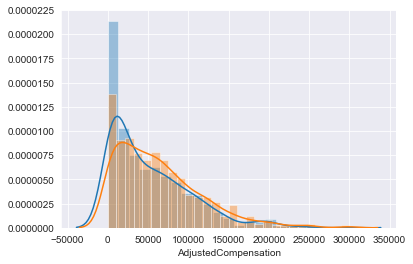

In [12]:
# Remove Outliers
print('Adjusted Compensation Percentiles for Formal Education Groups')
print('--------------------------------------------------------------')
for percentile in np.linspace(0.80, 1.00, 21):
    percentile_b =  round(sample_b.quantile(q=percentile), 2)
    percentile_m =  round(sample_m.quantile(q=percentile), 2)
    print('{}th Percentile:\tBachelor: {}\tMaster: {}'.format(round(percentile, 2), percentile_b, percentile_m))
    
out_limit = 300000
samp_filt_b = subset[(subset[x]==bach) & (subset[y]<=out_limit)][y]
samp_filt_m = subset[(subset[x]==mast) & (subset[y]<=out_limit)][y]
sns.distplot(samp_filt_b)
sns.distplot(samp_filt_m)

print('\nComparison of {} by {} for {} and {} with Outliers Above ${} Removed'.format(y, x, bach, mast, out_limit))
print('--------------------------------------------------------------')
print("Median Values: \tBachelor: {} \tMaster: {}".format(round(samp_filt_b.median(), 2), round(samp_filt_m.median(), 2)))
print("Mean Values: \tBachelor: {} \tMaster: {}".format(round(samp_filt_b.mean(), 2), round(samp_filt_m.mean(), 2)))
print('Sample Sizes: \tBachelor: {} \tMaster: {}'.format(len(samp_filt_b), len(samp_filt_m)))
print("Welch's T-Test P-Value:", fs.p_value_welch_ttest(samp_filt_b, samp_filt_m))

In [ ]:
# The Bachelor's degree and Master's degree groups are statistically different according to the results.
# These results require input data to be scrubbed of unusually high compensation records, however.
# If these records remain then no difference is found.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [13]:
#Your code here
doct = "Doctoral degree"
sample_d = subset[subset[x]==doct][y]

print('Comparison of {} by {} for {} and {}'.format(y, x, bach, doct))
print('--------------------------------------------------------------')
print("Median Values: \tBachelor: {} \tDoctor: {}".format(round(sample_b.median(), 2), round(sample_d.median(), 2)))
print("Mean Values: \tBachelor: {} \tDoctor: {}".format(round(sample_b.mean(), 2), round(sample_d.mean(), 2)))
print('Sample Sizes: \tBachelor: {} \tDoctor: {}'.format(len(sample_b), len(sample_d)))
print("Welch's T-Test P-Value:", fs.p_value_welch_ttest(sample_b, sample_d))

samp_filt_d = subset[(subset[x]==doct) & (subset[y]<=out_limit)][y]

print('\nComparison of {} by {} for {} and {} with Outliers Above ${} Removed'.format(y, x, bach, doct, out_limit))
print('--------------------------------------------------------------')
print("Median Values: \tBachelor: {} \tDoctor: {}".format(round(samp_filt_b.median(), 2), round(samp_filt_d.median(), 2)))
print("Mean Values: \tBachelor: {} \tDoctor: {}".format(round(samp_filt_b.mean(), 2), round(samp_filt_d.mean(), 2)))
print('Sample Sizes: \tBachelor: {} \tDoctor: {}'.format(len(samp_filt_b), len(samp_filt_d)))
print("Welch's T-Test P-Value:", fs.p_value_welch_ttest(samp_filt_b, samp_filt_d))

Comparison of AdjustedCompensation by FormalEducation for Bachelor's degree and Doctoral degree
--------------------------------------------------------------
Median Values: 	Bachelor: 38399.4 	Doctor: 74131.92
Mean Values: 	Bachelor: 64887.1 	Doctor: 29566175.76
Sample Sizes: 	Bachelor: 1107 	Doctor: 967
Welch's T-Test P-Value: 0.1568238199472023

Comparison of AdjustedCompensation by FormalEducation for Bachelor's degree and Doctoral degree with Outliers Above $300000 Removed
--------------------------------------------------------------
Median Values: 	Bachelor: 37488.0 	Doctor: 72266.16
Mean Values: 	Bachelor: 51968.52 	Doctor: 83440.21
Sample Sizes: 	Bachelor: 1097 	Doctor: 954
Welch's T-Test P-Value: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [15]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

print('ANOVA of {} by {} Categories'.format(y, x))
print('--------------------------------------------------------------')
formula = '{} ~ C({})'.format(y, x)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('\nANOVA of {} by {} Categories with Outliers Above ${} Removed'.format(y, x, out_limit))
print('--------------------------------------------------------------')
df_outlimit = df[df[y]<=300000]
formula2 = '{} ~ C({})'.format(y, x)
lm2 = ols(formula2, df_outlimit).fit()
table2 = sm.stats.anova_lm(lm2, typ=2)
print(table2)

ANOVA of AdjustedCompensation by FormalEducation Categories
--------------------------------------------------------------
                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN

ANOVA of AdjustedCompensation by FormalEducation Categories with Outliers Above $300000 Removed
--------------------------------------------------------------
                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.306853e+11     6.0  30.558557  4.061426e-36
Residual            1.244287e+13  4299.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!